**단항 선형 회귀**

In [20]:
import torch
import torch.nn as nn  # 파이토치를 이용해서 모델을 만들 때 필요한 모듈. (신경망 생성시 필요한 모듈)
import torch.optim as optim  # 경사하강법에 필요한 최적화 알고리즘을 구현하는 패키지.
import matplotlib.pyplot as plt

torch.manual_seed(2025)  # 모델 생성 전 난수 고정

# 1. 데이터 정의
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])


# 2. 모델 정의
model = nn.Linear(1, 1)  # 입력 1개 → 출력 1개


# 3. 손실 함수 및 옵티마이저 설정
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


# 4. 학습 반복
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss: .6f}')


# 5. 학습된 파라미터 출력
print("\n 학습된 모델 파라미터:")
for name, param in model.named_parameters():
    print(f"{name}:\n{param.data}")


# 6. 새 입력에 대한 예측
x_test = torch.FloatTensor([[5]])
y_test_pred = model(x_test)

print(f"\n x=5일 때 예측값: {y_test_pred.item():.4f}")

Epoch: 0/1000 Loss:  7.478992
Epoch: 100/1000 Loss:  0.156957
Epoch: 200/1000 Loss:  0.096990
Epoch: 300/1000 Loss:  0.059934
Epoch: 400/1000 Loss:  0.037035
Epoch: 500/1000 Loss:  0.022886
Epoch: 600/1000 Loss:  0.014142
Epoch: 700/1000 Loss:  0.008739
Epoch: 800/1000 Loss:  0.005400
Epoch: 900/1000 Loss:  0.003337
Epoch: 1000/1000 Loss:  0.002062

 학습된 모델 파라미터:
weight:
tensor([[1.9474]])
bias:
tensor([0.1196])

 x=5일 때 예측값: 9.8565


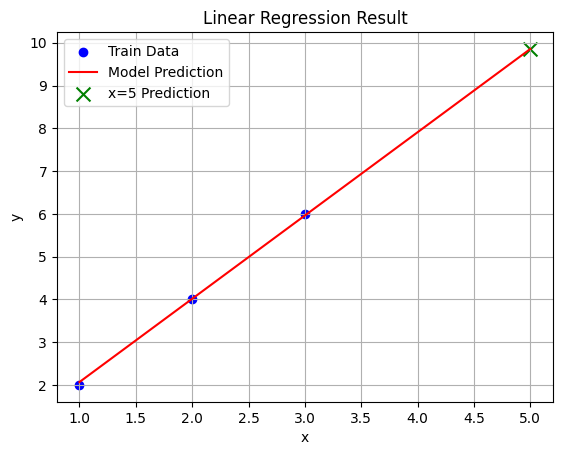

In [21]:
# 예측선을 위한 입력값 생성
x_plot = torch.linspace(1, 5, 100).unsqueeze(1)         # shape: (100, 1)
y_plot = model(x_plot).detach()                         # 예측값, detach로 연산 그래프에서 분리

# 시각화
plt.scatter(x_train.numpy(), y_train.numpy(), label='Train Data', color='blue')  # 실제 학습 데이터
plt.plot(x_plot.numpy(), y_plot.numpy(), label='Model Prediction', color='red')  # 예측 선

plt.scatter(x_test.numpy(), y_test_pred.detach().numpy(), color='green', marker='x', s=100, label='x=5 Prediction')

plt.title('Linear Regression Result')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

**다중 선형 회귀**

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

# GPU 사용 가능 시 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device: {device}")

# 1. 데이터 정의
X_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70],
                             [85, 90, 88],
                             [78, 85, 82]]).to(device)

y_train = torch.FloatTensor([[152], [185], [180], [196], [142], [175], [155]]).to(device)


# 2. 선형 회귀 모델 생성
model = nn.Linear(3, 1).to(device)    # y = w1·x1 + w2·x2 + w3·x3 + b


# 3. 손실함수 및 옵티마이저(Adam) 설정
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# 4. 모델 학습
epochs = 1000
for epoch in range(epochs+1):
    #예측
    y_pred = model(X_train)

    # 손실 계산
    loss = loss_fn(y_pred, y_train)

    # 역전파 및 가중치 갱신
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 100 에폭마다 출력
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs}, Loss: {loss.item(): .6f}')


# 5. 학습된 모델의 파라미터 출력
print("\n 학습된 모델 파라미터:")
for name, param in model.named_parameters():
    print(f"{name}:\n{param.data}")

# 6. 새 데이터에 대한 예측
x_test = torch.FloatTensor([[93, 93, 93]]).to(device)
y_test_pred = model(x_test)

print(f"\n새로운 입력 데이터 {x_test.tolist()}의 예측 결과: {y_test_pred.item():.4f}")

device: cpu
Epoch: 0/1000, Loss:  31238.453125
Epoch: 100/1000, Loss:  118.153038
Epoch: 200/1000, Loss:  12.550371
Epoch: 300/1000, Loss:  12.513173
Epoch: 400/1000, Loss:  12.471367
Epoch: 500/1000, Loss:  12.423098
Epoch: 600/1000, Loss:  12.368750
Epoch: 700/1000, Loss:  12.308585
Epoch: 800/1000, Loss:  12.242879
Epoch: 900/1000, Loss:  12.171770
Epoch: 1000/1000, Loss:  12.095415

 학습된 모델 파라미터:
weight:
tensor([[0.4640, 0.5508, 0.9735]])
bias:
tensor([0.1409])

새로운 입력 데이터 [[93.0, 93.0, 93.0]]의 예측 결과: 185.0458


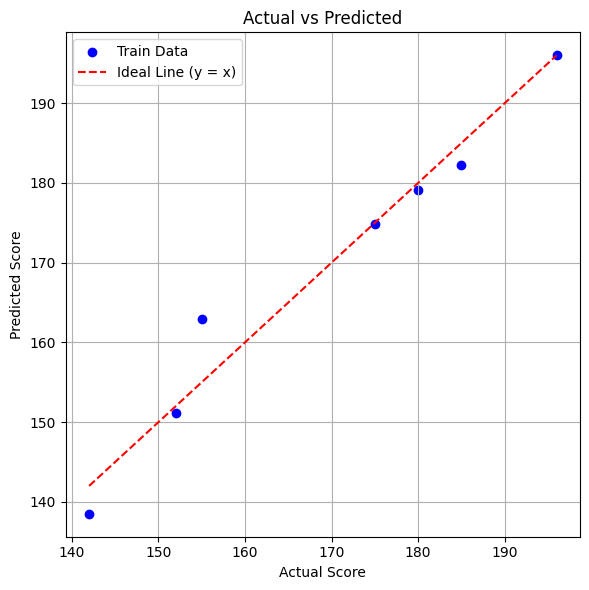

In [23]:
import matplotlib.pyplot as plt

# 모델 예측값 계산 (학습 데이터 기준)
with torch.no_grad():
    y_train_pred = model(X_train).cpu()
    y_train_true = y_train.cpu()

# 산점도: 실제값 vs 예측값
plt.figure(figsize=(6, 6))
plt.scatter(y_train_true, y_train_pred, color='blue', label='Train Data')
plt.plot([y_train_true.min(), y_train_true.max()],
         [y_train_true.min(), y_train_true.max()],
         color='red', linestyle='--', label='Ideal Line (y = x)')

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
